In [ ]:
##IMPORT LIBRARIES

from pycaret.utils import enable_colab #IF YOU USE COLAB NOTEBOOK

from pycaret.classification import *
import pandas as pd 
import numpy as np

In [ ]:
#IMPORT CLEAN DATAFRAME

f1 = pd.read_csv('finalf1.csv')
f1 = f1.drop(['Unnamed: 0'], axis=1)

In [ ]:
#check the dataframe

print(f1)

,driverRef,grid,positionOrder,constructorRef,circuitRef
0,hamilton,1,19,mercedes,albert_park
1,hamilton,1,1,mercedes,albert_park
2,hamilton,1,2,mercedes,albert_park
3,hamilton,1,2,mercedes,albert_park
4,hamilton,1,2,mercedes,albert_park
...,...,...,...,...,...
3002,ocon,7,11,renault,istanbul
3003,perez,3,2,racing_point,istanbul
3004,stroll,1,9,racing_point,istanbul
3005,kvyat,16,12,alphatauri,istanbul


In [ ]:
#split dataframe for train/test

train = f1
test = f1[-10:]



#check dtypes
train.dtypes

driverRef         object
grid               int64
positionOrder      int64
constructorRef    object
circuitRef        object
dtype: object

In [ ]:
#SETUP PYCARET MODEL

clf1 = setup(data = train, 
             target = 'positionOrder',
             numeric_imputation = 'mean',
            
             categorical_features = ['driverRef','constructorRef','circuitRef'], 
             
             silent = True)

,Description,Value
0,session_id,516
1,Target,positionOrder
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3007, 5)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#CREATE PYCARET MODEL

knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0900,0.5938,0.0852,0.0736,0.0766,0.0437,0.0440
1,0.1469,0.6136,0.1400,0.1175,0.1242,0.1030,0.1039
2,0.1422,0.5773,0.1323,0.1154,0.1244,0.0985,0.0991
3,0.1137,0.5824,0.1060,0.0907,0.0933,0.0680,0.0688
4,0.1238,0.6207,0.1164,0.0947,0.1037,0.0786,0.0791
5,0.1381,0.6249,0.1291,0.1042,0.1137,0.0935,0.0942
6,0.1238,0.6163,0.1105,0.0888,0.0987,0.0777,0.0782
7,0.1476,0.5875,0.1353,0.1069,0.1203,0.1033,0.1043
8,0.1619,0.6197,0.1503,0.1332,0.1399,0.1187,0.1195
9,0.1238,0.5689,0.1131,0.1029,0.1074,0.0784,0.0790


In [ ]:
#TUNE THE MODEL

tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.1374,0.6760,0.1288,0.1073,0.1139,0.0935,0.0942
1,0.1043,0.6665,0.0960,0.0895,0.0937,0.0581,0.0585
2,0.1469,0.6519,0.1393,0.1195,0.1287,0.1034,0.1039
3,0.1706,0.6577,0.1602,0.1503,0.1516,0.1277,0.1287
4,0.1429,0.6988,0.1311,0.1310,0.1299,0.0982,0.0988
5,0.1667,0.6891,0.1562,0.1372,0.1474,0.1232,0.1240
6,0.1381,0.7029,0.1237,0.1098,0.1178,0.0927,0.0932
7,0.1714,0.6547,0.1557,0.1476,0.1544,0.1281,0.1290
8,0.1476,0.6907,0.1338,0.1180,0.1284,0.1033,0.1039
9,0.1238,0.6772,0.1136,0.1173,0.1143,0.0785,0.0790


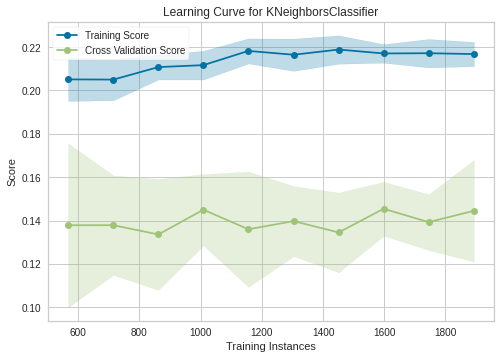

In [ ]:
#CHEK THE LEARNING CURVE

plot_model(estimator = tuned_knn, plot = 'learning')

In [ ]:
#TEST THE MODEL

predict_model(tuned_knn, data=test)

,driverRef,grid,positionOrder,constructorRef,circuitRef,Label,Score
2997,max_verstappen,2,6,red_bull,istanbul,1,0.2667
2998,albon,4,7,red_bull,istanbul,3,0.2000
2999,grosjean,17,18,haas,istanbul,13,0.0333
3000,kevin_magnussen,13,17,haas,istanbul,13,0.0333
3001,ricciardo,5,10,renault,istanbul,3,0.1333
3002,ocon,7,11,renault,istanbul,6,0.2333
3003,perez,3,2,racing_point,istanbul,5,0.1000
3004,stroll,1,9,racing_point,istanbul,1,0.2000
3005,kvyat,16,12,alphatauri,istanbul,12,0.0667
3006,gasly,19,13,alphatauri,istanbul,12,0.1000


In [ ]:
#FINALIZE THE MODEL


knn = finalize_model(tuned_knn)

In [ ]:
#SAVE MODEL IN A PICKLE ITEM
save_model(knn,'knn1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['driverRef',
                                                             'constructorRef',
                                                             'circuitRef'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='positionOrder',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categor...
                 ('fix_perfect', Remove_100(target='positionOrder')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('

In [ ]:
##TABLEAU QUERY TO BE INSERTED IN THE CALCULATED FIELD

SCRIPT_INT("
import pandas as pd
import pycaret.classification
knn = pycaret.classification.load_model(r'C:\Users\patri\OneDrive\Ambiente de Trabalho\Projectos\project f1\knn1')
X_pred = pd.DataFrame({'driverRef':_arg1, 'grid':_arg2, 'constructorRef':_arg3, 'circuitRef':_arg4})
                        
pred = pycaret.classification.predict_model(knn, X_pred)
return pred['Label'].tolist()
",
ATTR([Driver Ref]),
AVG([Grid]),
ATTR([Constructor Ref]),
ATTR([Circuit Ref])
)